importing libraries 

In [1]:
import tarfile
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import json
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Data loading 

In [2]:
# import the data (chunksize returns jsonReader for iteration)
businesses = next(pd.read_json(r"C:\Users\Taranjot\Downloads\yelp_dataset\yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=100000))
reviews = next(pd.read_json(r"C:\Users\Taranjot\Downloads\yelp_dataset\yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=100000))
checkins = next(pd.read_json(r"C:\Users\Taranjot\Downloads\yelp_dataset\yelp_academic_dataset_checkin.json", lines=True, orient='columns', chunksize=100000))
users = next(pd.read_json(r"C:\Users\Taranjot\Downloads\yelp_dataset\yelp_academic_dataset_user.json", lines=True, orient='columns', chunksize=100000))
tips = next(pd.read_json(r"C:\Users\Taranjot\Downloads\yelp_dataset\yelp_academic_dataset_tip.json", lines=True, orient='columns', chunksize=100000))

In [3]:
businesses.head()

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.955505  -75.155564    4.0            80        1   
4  40.338183  -75.471659    4.5            13        1   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   
4  {'BusinessAcceptsCreditCards': 'True', 'Wheelc...   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   
2  Department Stores, Shopping, Fashion, Home & G...   
3  Restaurants, Food, Bubble Tea, Coffee & Tea, B...   
4                          Brewpubs, Breweries, Food   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...  
2  {'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...  
4  {'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...

In [4]:
reviews.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03  
4  Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15

In [5]:
checkins.head()

business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...

In [6]:
users.head()

user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   267  ...   
1  ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...  3138  ...   
2  LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...    52  ...   
3  enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...    28  ...   
4  PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...     1  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0               65                  55               56               18   
1              264                 184              157              251   
2               13                  10               17                3   
3                4                   1                6                2   
4                1                   0                0                0   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0              232               844              467               467   
1             1847              7054             3131              3131   
2               66                96              119               119   
3               12                16               26                26   
4                1                 1                0                 0   

   compliment_writer  compliment_photos  
0                239                180  
1               1521               1946  
2                 35                 18  
3                 10                  9  
4                  0                  0  

[5 rows x 22 columns]

In [7]:
tips.head()

user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                date  \
0                     Avengers time with the ladies. 2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban... 2013-02-05 18:35:10   
2             It's open even when you think it isn't 2013-08-18 00:56:08   
3                          Very decent fried chicken 2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch 2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

Merging all the datasets 

In [8]:
# Step 1: Merging Reviews with Businesses on 'business_id'
merged_df = pd.merge(reviews, businesses, how='left', on='business_id')

# Step 2: Merging the result with Checkins on 'business_id'
merged_df = pd.merge(merged_df, checkins, how='left', on='business_id')

# Step 3: Merging the result with Users on 'user_id'
merged_df = pd.merge(merged_df, users, how='left', on='user_id')

# Step 4: Merging the result with Tips on 'business_id' and 'user_id'
# (In case both identifiers are required for linking)
merged_df = pd.merge(merged_df, tips, how='left', on=['business_id', 'user_id'])


EDA

In [9]:
# Display the final merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100284 entries, 0 to 100283
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_id           100284 non-null  object        
 1   user_id             100284 non-null  object        
 2   business_id         100284 non-null  object        
 3   stars_x             100284 non-null  int64         
 4   useful_x            100284 non-null  int64         
 5   funny_x             100284 non-null  int64         
 6   cool_x              100284 non-null  int64         
 7   text_x              100284 non-null  object        
 8   date_x              100284 non-null  datetime64[ns]
 9   name_x              100284 non-null  object        
 10  address             100284 non-null  object        
 11  city                100284 non-null  object        
 12  state               100284 non-null  object        
 13  postal_code         100284 no

In [10]:
merged_df.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars_x  useful_x  funny_x  cool_x  \
0        3         0        0       0   
1        5         1        0       1   
2        3         0        0       0   
3        5         1        0       1   
4        4         1        0       1   

                                              text_x              date_x  \
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30   
3  Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03   
4  Cute interior and owner (?) gave us tour of up... 2017-01-14 20:54:15   

                         name_x  ... compliment_list compliment_note  \
0  Turning Point of North Wales  ...             NaN             NaN   
1    Body Cycle Spinning Studio  ...             0.0             0.0   
2             Kettle Restaurant  ...             1.0            63.0   
3                         Zaika  ...             NaN             NaN   
4                          Melt  ...             NaN             NaN   

  compliment_plain compliment_cool  compliment_funny  compliment_writer  \
0              NaN             NaN               NaN                NaN   
1              0.0             0.0               0.0                0.0   
2             96.0            86.0              86.0               49.0   
3              NaN             NaN               NaN                NaN   
4              NaN             NaN               NaN                NaN   

   compliment_photos  text_y  date compliment_count  
0                NaN     NaN   NaT              NaN  
1                0.0     NaN   NaT              NaN  
2               27.0     NaN   NaT              NaN  
3                NaN     NaN   NaT              NaN  
4                NaN     NaN   NaT              NaN  

[5 rows x 47 columns]

In [11]:
# Summary statistics for businesses
print("Businesses Summary:")
businesses.describe()

Businesses Summary:


latitude      longitude          stars   review_count  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       36.667424     -89.377957       3.597235      44.797370   
std         5.873946      14.916590       0.974157     115.331887   
min        27.555127    -120.095137       1.000000       5.000000   
25%        32.186827     -90.358516       3.000000       8.000000   
50%        38.773531     -86.122645       3.500000      15.000000   
75%        39.954097     -75.424966       4.500000      37.000000   
max        53.679197     -74.658572       5.000000    6093.000000   

             is_open  
count  100000.000000  
mean        0.796200  
std         0.402824  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [12]:
# Summary statistics for reviews
print("\nReviews Summary:")
reviews.describe()


Reviews Summary:


stars         useful          funny           cool  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        3.842910       0.898980       0.257180       0.347030   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         5.000000       1.000000       0.000000       0.000000   
max         5.000000     320.000000      98.000000      49.000000   
std         1.354729       2.205186       1.010212       1.066382   

                                date  
count                         100000  
mean   2015-05-02 14:36:08.625299968  
min              2005-03-01 17:47:15  
25%    2013-12-07 13:33:34.750000128  
50%       2015-09-26 23:21:59.500000  
75%    2017-04-08 12:26:05.249999872  
max              2018-10-04 18:22:35  
std                              NaN

In [13]:
# Summary statistics for check-ins
print("\nCheck-ins Summary:")
checkins.describe()


Check-ins Summary:


business_id  \
count                   100000   
unique                  100000   
top     ---kPU91CF4Lq2-WlRu9Lw   
freq                         1   

                                                     date  
count                                              100000  
unique                                             100000  
top     2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...  
freq                                                    1

In [14]:
# Summary statistics for users
print("\nUsers Summary:")
users.describe()


Users Summary:


review_count         useful          funny           cool  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       92.633500     217.217900      91.406500     131.098710   
std       235.343251    1635.731828    1058.049858    1401.437743   
min         0.000000       0.000000       0.000000       0.000000   
25%        10.000000       7.000000       1.000000       1.000000   
50%        27.000000      26.000000       5.000000       7.000000   
75%        80.000000      96.000000      24.000000      31.000000   
max     17473.000000  206296.000000  185823.000000  195814.000000   

                fans  average_stars  compliment_hot  compliment_more  \
count  100000.000000  100000.000000   100000.000000    100000.000000   
mean        7.478960       3.853158        9.201240         1.526240   
std        57.493123       0.681401      123.196998        21.728636   
min         0.000000       1.000000        0.000000         0.000000   
25%         0.000000       3.530000        0.000000         0.000000   
50%         1.000000       3.910000        0.000000         0.000000   
75%         4.000000       4.280000        1.000000         1.000000   
max     12497.000000       5.000000    12391.000000      4347.000000   

       compliment_profile  compliment_cute  compliment_list  compliment_note  \
count       100000.000000    100000.000000    100000.000000    100000.000000   
mean             0.987990         0.676530         0.399460         7.350100   
std             31.498351        12.554029        12.538627        69.760793   
min              0.000000         0.000000         0.000000         0.000000   
25%              0.000000         0.000000         0.000000         0.000000   
50%              0.000000         0.000000         0.000000         0.000000   
75%              0.000000         0.000000         0.000000         2.000000   
max           7039.000000      1744.000000      2607.000000      8616.000000   

       compliment_plain  compliment_cool  compliment_funny  compliment_writer  \
count     100000.000000    100000.000000     100000.000000      100000.000000   
mean          16.397630        14.679750         14.679750           5.997230   
std          237.128593       172.564051        172.564051          70.320518   
min            0.000000         0.000000          0.000000           0.000000   
25%            0.000000         0.000000          0.000000           0.000000   
50%            0.000000         0.000000          0.000000           0.000000   
75%            3.000000         2.000000          2.000000           1.000000   
max        28974.000000     13280.000000      13280.000000        9821.000000   

       compliment_photos  
count      100000.000000  
mean            5.130220  
std           104.642959  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max         14045.000000

In [15]:
# Summary statistics for tips
print("\nTips Summary:")
tips.describe()


Tips Summary:


date  compliment_count
count                         100000     100000.000000
mean   2014-01-16 23:24:28.094060032          0.013710
min              2009-04-16 13:11:49          0.000000
25%              2012-04-29 01:56:45          0.000000
50%              2013-12-04 21:11:37          0.000000
75%              2015-09-10 21:16:18          0.000000
max              2018-05-05 08:19:29          5.000000
std                              NaN          0.124749

In [16]:
# Summary statistics for tips
print("\nMerged dataset Summary:")
merged_df.describe()


Merged dataset Summary:


stars_x       useful_x        funny_x         cool_x  \
count  100284.000000  100284.000000  100284.000000  100284.000000   
mean        3.844302       0.902916       0.258705       0.349497   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         5.000000       1.000000       0.000000       0.000000   
max         5.000000     320.000000      98.000000      49.000000   
std         1.353913       2.209500       1.012354       1.071488   

                              date_x       latitude      longitude  \
count                         100284  100284.000000  100284.000000   
mean   2015-04-30 06:22:18.841500160      36.073235     -89.002017   
min              2005-03-01 17:47:15      27.555127    -120.095137   
25%    2013-11-20 16:40:43.249999872      29.968642     -90.240317   
50%       2015-09-26 01:16:51.500000      38.613090     -86.241454   
75%              2017-04-07 23:54:21      39.946677     -75.325628   
max              2018-10-04 18:22:35      53.644501     -74.658572   
std                              NaN       5.295898      14.432225   

             stars_y  review_count_x        is_open  ...  compliment_cute  \
count  100284.000000   100284.000000  100284.000000  ...     58627.000000   
mean        3.770656      386.401031       0.765287  ...         1.385471   
min         1.000000        5.000000       0.000000  ...         0.000000   
25%         3.500000       60.000000       1.000000  ...         0.000000   
50%         4.000000      169.000000       1.000000  ...         0.000000   
75%         4.000000      427.000000       1.000000  ...         0.000000   
max         5.000000     4554.000000       1.000000  ...      1622.000000   
std         0.672888      621.701039       0.423822  ...        19.479765   

       compliment_list  compliment_note  compliment_plain  compliment_cool  \
count     58627.000000     58627.000000      58627.000000     58627.000000   
mean          1.042694        20.330036         49.084841        37.322565   
min           0.000000         0.000000          0.000000         0.000000   
25%           0.000000         0.000000          0.000000         0.000000   
50%           0.000000         1.000000          1.000000         1.000000   
75%           0.000000         7.000000          9.000000         9.000000   
max        2607.000000      8616.000000      13807.000000     13280.000000   
std          21.429459       125.201881        392.912565       265.389013   

       compliment_funny  compliment_writer  compliment_photos  \
count      58627.000000       58627.000000       58627.000000   
mean          37.322565          15.096764          12.145394   
min            0.000000           0.000000           0.000000   
25%            0.000000           0.000000           0.000000   
50%            1.000000           1.000000           0.000000   
75%            9.000000           6.000000           1.000000   
max        13280.000000        9821.000000       10346.000000   
std          265.389013         116.175750         115.163688   

                                date  compliment_count  
count                           1972       1972.000000  
mean   2014-04-21 22:16:41.393509120          0.011663  
min              2009-11-07 20:25:50          0.000000  
25%       2012-07-28 01:31:29.500000          0.000000  
50%       2014-04-24 21:19:38.500000          0.000000  
75%       2016-01-03 03:12:58.500000          0.000000  
max              2018-05-03 23:10:03          1.000000  
std                              NaN          0.107392  

[8 rows x 29 columns]

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100284 entries, 0 to 100283
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_id           100284 non-null  object        
 1   user_id             100284 non-null  object        
 2   business_id         100284 non-null  object        
 3   stars_x             100284 non-null  int64         
 4   useful_x            100284 non-null  int64         
 5   funny_x             100284 non-null  int64         
 6   cool_x              100284 non-null  int64         
 7   text_x              100284 non-null  object        
 8   date_x              100284 non-null  datetime64[ns]
 9   name_x              100284 non-null  object        
 10  address             100284 non-null  object        
 11  city                100284 non-null  object        
 12  state               100284 non-null  object        
 13  postal_code         100284 no

In [18]:
# Check for missing values
print("Businesses Missing Values:")
businesses.isnull().sum()

Businesses Missing Values:


business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes       9085
categories         69
hours           15436
dtype: int64

In [19]:
print("Reviews Missing Values:")
print(reviews.isnull().sum())

Reviews Missing Values:
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [20]:
print("Check-ins Missing Values:")
print(checkins.isnull().sum())

Check-ins Missing Values:
business_id    0
date           0
dtype: int64


In [21]:
print("Users Missing Values:")
print(users.isnull().sum())

Users Missing Values:
user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [22]:
print("Tips Missing Values:")
print(tips.isnull().sum())

Tips Missing Values:
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64


In [23]:
print("Merged dataset Missing Values:")
print(merged_df.isnull().sum())

Merged dataset Missing Values:
review_id                 0
user_id                   0
business_id               0
stars_x                   0
useful_x                  0
funny_x                   0
cool_x                    0
text_x                    0
date_x                    0
name_x                    0
address                   0
city                      0
state                     0
postal_code               0
latitude                  0
longitude                 0
stars_y                   0
review_count_x            0
is_open                   0
attributes             1631
categories                4
hours                  5845
date_y                24646
name_y                41657
review_count_y        41657
yelping_since         41657
useful_y              41657
funny_y               41657
cool_y                41657
elite                 41657
friends               41657
fans                  41657
average_stars         41657
compliment_hot        41657
compliment_more  

In [24]:
# Displaying the data types of each column in the merged_df DataFrame
print(merged_df.dtypes)

review_id                     object
user_id                       object
business_id                   object
stars_x                        int64
useful_x                       int64
funny_x                        int64
cool_x                         int64
text_x                        object
date_x                datetime64[ns]
name_x                        object
address                       object
city                          object
state                         object
postal_code                   object
latitude                     float64
longitude                    float64
stars_y                      float64
review_count_x                 int64
is_open                        int64
attributes                    object
categories                    object
hours                         object
date_y                        object
name_y                        object
review_count_y               float64
yelping_since                 object
useful_y                     float64
f

Numerical columns 

In [25]:
# Separate numerical columns (float64 and int64) excluding 'is_open'
numerical_columns_df = merged_df.drop('is_open', axis=1).select_dtypes(include=[np.float64, np.int64])

# Get the shape of the numerical columns
print("Numerical Columns:")
print(numerical_columns_df.columns)
print(numerical_columns_df.shape)

Numerical Columns:
Index(['stars_x', 'useful_x', 'funny_x', 'cool_x', 'latitude', 'longitude',
       'stars_y', 'review_count_x', 'review_count_y', 'useful_y', 'funny_y',
       'cool_y', 'fans', 'average_stars', 'compliment_hot', 'compliment_more',
       'compliment_profile', 'compliment_cute', 'compliment_list',
       'compliment_note', 'compliment_plain', 'compliment_cool',
       'compliment_funny', 'compliment_writer', 'compliment_photos',
       'compliment_count'],
      dtype='object')
(100284, 26)


Categorical columns

In [26]:
# Separate categorical columns
categorical_columns_df = merged_df.select_dtypes(include=['object'])
# Get the shape of the categorical columns
print("Categorical Columns:")
print(categorical_columns_df.columns)
print(categorical_columns_df.shape)


Categorical Columns:
Index(['review_id', 'user_id', 'business_id', 'text_x', 'name_x', 'address',
       'city', 'state', 'postal_code', 'attributes', 'categories', 'hours',
       'date_y', 'name_y', 'yelping_since', 'elite', 'friends', 'text_y'],
      dtype='object')
(100284, 18)


Datetime columns



In [27]:
# Separate datetime columns
datetime_columns_df = merged_df.select_dtypes(include=[np.datetime64])

# Get the shape of the datetime columns
print("Datetime Columns:")
print(datetime_columns_df.columns)
print(datetime_columns_df.shape)

Datetime Columns:
Index(['date_x', 'date'], dtype='object')
(100284, 2)


In [28]:
categorical_columns_df = pd.DataFrame(categorical_columns_df)
display(categorical_columns_df)

review_id                 user_id  \
0       KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1       BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q   
2       saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A   
3       AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
4       Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
...                        ...                     ...   
100279  pAEbIxvr6ebx2bHc1XvguA  SMH5CeiLvKx61lKwtLZ_PA   
100280  xH1AoE-4nf2ECGQJRjO4_g  2clTdtp-BjphxLjN83CpUA   
100281  GatIbXTz-WDru5emONUSIg  MRrN6DH3QGCFcDv5RENYVg   
100282  6NfkodAdhvI89xONXuBC3A  rnNQzeKJbvqVCsYsL10mkQ   
100283  sJ1BMq7lkKgOWEFx3n6ZRw  _BcWyKQL16ndpBdggh2kNA   

                   business_id  \
0       XQfwVwDr-v0ZS3_CbbE5Xw   
1       7ATYjTIgM3jUlt4UM3IypQ   
2       YjUWPpI6HXG530lwP-fb2A   
3       kxX2SOes4o-D3ZQBkiMRfA   
4       e4Vwtrqf-wpJfwesgvdgxQ   
...                        ...   
100279  lV0k3BnslFRkuWD_kbKd0Q   
100280  G0xz3kyRhRi6oZl7KfR0pA   
100281  C4lZdhasjZVQyDlOiXY1sA   
100282  dChRGpit9fM_kZK5pafNyA   
100283  hMcgO98QaOFmQVTfCUeGzw   

                                                   text_x  \
0       If you decide to eat here, just be aware it is...   
1       I've taken a lot of spin classes over the year...   
2       Family diner. Had the buffet. Eclectic assortm...   
3       Wow!  Yummy, different,  delicious.   Our favo...   
4       Cute interior and owner (?) gave us tour of up...   
...                                                   ...   
100279  Came here for lunch with a group. They were bu...   
100280  The equipment is so old and so felty! I just u...   
100281  This is one of my favorite Mexican restaurants...   
100282  Came here for brunch - had an omlette ($19 + t...   
100283  Came in for my 5-6 month prophy and saw Kara -...   

                                name_x                   address  \
0         Turning Point of North Wales       1460 Bethlehem Pike   
1           Body Cycle Spinning Studio  1923 Chestnut St, 2nd Fl   
2                    Kettle Restaurant     748 W Starr Pass Blvd   
3                                Zaika            2481 Grant Ave   
4                                 Melt             2549 Banks St   
...                                ...                       ...   
100279                     Metro Diner            2258 W 86th St   
100280                 Esporta Fitness             2961 Swede Rd   
100281  Buena Vista Mexican Restaurant         215 Lancaster Ave   
100282                        The Love             130 S 18th St   
100283              Dentistry For Life  1601 Walnut St, Ste 1217   

                 city state postal_code  \
0         North Wales    PA       19454   
1        Philadelphia    PA       19119   
2              Tucson    AZ       85713   
3        Philadelphia    PA       19114   
4         New Orleans    LA       70119   
...               ...   ...         ...   
100279   Indianapolis    IN       46260   
100280  East Norriton    PA       19401   
100281        Malvern    PA       19355   
100282   Philadelphia    PA       19103   
100283   Philadelphia    PA       19102   

                                               attributes  \
0       {'NoiseLevel': 'u'average'', 'HasTV': 'False',...   
1       {'BusinessAcceptsCreditCards': 'True', 'GoodFo...   
2       {'RestaurantsReservations': 'True', 'BusinessP...   
3       {'Caters': 'True', 'Ambience': '{'romantic': F...   
4       {'BusinessParking': '{'garage': False, 'street...   
...                                                   ...   
100279  {'RestaurantsTableService': 'True', 'OutdoorSe...   
100280  {'GoodForKids': 'False', 'ByAppointmentOnly': ...   
100281  {'NoiseLevel': 'u'quiet'', 'RestaurantsTakeOut...   
100282  {'BusinessAcceptsCreditCards': 'True', 'Restau...   
100283                      {'ByAppointmentOnly': 'True'}   

                                               categories  \
0       Restaurants, Breakfast & Brunch, Food, Juice B

In [29]:
# Sorting categorical columns alphabetically to group features to understand better.
categorical_columns_df_sorted_alphabetically = categorical_columns_df[sorted(categorical_columns_df.columns)]

categorical_columns_df_sorted_alphabetically.head()

address  \
0       1460 Bethlehem Pike   
1  1923 Chestnut St, 2nd Fl   
2     748 W Starr Pass Blvd   
3            2481 Grant Ave   
4             2549 Banks St   

                                          attributes             business_id  \
0  {'NoiseLevel': 'u'average'', 'HasTV': 'False',...  XQfwVwDr-v0ZS3_CbbE5Xw   
1  {'BusinessAcceptsCreditCards': 'True', 'GoodFo...  7ATYjTIgM3jUlt4UM3IypQ   
2  {'RestaurantsReservations': 'True', 'BusinessP...  YjUWPpI6HXG530lwP-fb2A   
3  {'Caters': 'True', 'Ambience': '{'romantic': F...  kxX2SOes4o-D3ZQBkiMRfA   
4  {'BusinessParking': '{'garage': False, 'street...  e4Vwtrqf-wpJfwesgvdgxQ   

                                          categories          city  \
0  Restaurants, Breakfast & Brunch, Food, Juice B...   North Wales   
1  Active Life, Cycling Classes, Trainers, Gyms, ...  Philadelphia   
2                    Restaurants, Breakfast & Brunch        Tucson   
3              Halal, Pakistani, Restaurants, Indian  Philadelphia   
4  Sandwiches, Beer, Wine & Spirits, Bars, Food, ...   New Orleans   

                                              date_y  \
0  2017-04-15 15:45:08, 2017-04-17 15:27:01, 2017...   
1  2011-02-26 13:45:56, 2011-03-08 00:05:30, 2011...   
2  2010-08-24 08:46:56, 2010-11-14 02:32:49, 2010...   
3                                                NaN   
4  2016-12-30 20:46:48, 2016-12-30 20:52:41, 2017...   

                                      elite  \
0                                       NaN   
1                                             
2  2014,2015,2016,2017,2018,2019,20,20,2021   
3                                       NaN   
4                                       NaN   

                                             friends  \
0                                                NaN   
1  7uYgWwryg8KH33i1SLJUTQ, 0mGJMNL8o2AY4BT1d4TTDQ...   
2  IaqwLtG5Se-kt_MHBOalag, tBpyi-tXOYQlkjtQKPd5aw...   
3                                                NaN   
4                                                NaN   

                                               hours  \
0  {'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...   
1  {'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3...   
2                                               None   
3  {'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...   
4  {'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...   

                         name_x name_y postal_code               review_id  \
0  Turning Point of North Wales    NaN       19454  KU_O5udG6zpxOg-VcAEodg   
1    Body Cycle Spinning Studio   Erin       19119  BiTunyQ73aT9WBnpR9DZGw   
2             Kettle Restaurant  Debra       85713  saUsX_uimxRlCVr67Z4Jig   
3                         Zaika    NaN       19114  AqPFMleE6RsU23_auESxiA   
4                          Melt    NaN       70119  Sx8TMOWLNuJBWer-0pcmoA   

  state                                             text_x text_y  \
0    PA  If you decide to eat here, just be aware it is...    NaN   
1    PA  I've taken a lot of spin classes over the year...    NaN   
2    AZ  Family diner. Had the buffet. Eclectic assortm...    NaN   
3    PA  Wow!  Yummy, different,  delicious.   Our favo...    NaN   
4    LA  Cute interior and owner (?) gave us tour of up...    NaN   

                  user_id        yelping_since  
0  mh_-eMZ6K5RLWhZyISBhwA                  NaN  
1  OyoGAe7OKpv6SyGZT5g77Q  2011-03-07 19:45:15  
2  8g_iMtfSiwikVnbP2etR0A  2012-09-04 23:57:25  
3  _7bHUi9Uuf5__HHc_Q8guQ                  NaN  
4  bcjbaE6dDog4jkNY91ncLQ                  NaN

In [30]:
#checking out numerical columns
numerical_columns_df = pd.DataFrame(numerical_columns_df)
display(numerical_columns_df)

stars_x  useful_x  funny_x  cool_x   latitude   longitude  stars_y  \
0             3         0        0       0  40.210196  -75.223639      3.0   
1             5         1        0       1  39.952103  -75.172753      5.0   
2             3         0        0       0  32.207233 -110.980864      3.5   
3             5         1        0       1  40.079848  -75.025080      4.0   
4             4         1        0       1  29.962102  -90.087958      4.0   
...         ...       ...      ...     ...        ...         ...      ...   
100279        4         0        0       0  39.913046  -86.200355      4.0   
100280        1         1        0       0  40.147359  -75.318160      2.5   
100281        4         0        0       0  40.042104  -75.541083      3.5   
100282        2         0        0       0  39.950656  -75.170899      4.0   
100283        5         0        0       0  39.950362  -75.167774      4.0   

        review_count_x  review_count_y  useful_y  ...  compliment_profile  \
0                  169             NaN       NaN  ...                 NaN   
1                  144            10.0       6.0  ...                 0.0   
2                   47          1332.0    1660.0  ...                 3.0   
3                  181             NaN       NaN  ...                 NaN   
4                   32             NaN       NaN  ...                 NaN   
...                ...             ...       ...  ...                 ...   
100279             175             NaN       NaN  ...                 NaN   
100280              55             NaN       NaN  ...                 NaN   
100281             107            51.0      36.0  ...                 0.0   
100282             618             NaN       NaN  ...                 NaN   
100283              22          4274.0   16950.0  ...                42.0   

        compliment_cute  compliment_list  compliment_note  compliment_plain  \
0                   NaN              NaN              NaN               NaN   
1                   0.0              0.0              0.0               0.0   
2                   1.0              1.0             63.0              96.0   
3                   NaN              NaN              NaN               NaN   
4                   NaN              NaN              NaN               NaN   
...                 ...              ...              ...               ...   
100279              NaN              NaN              NaN               NaN   
100280              NaN              NaN              NaN               NaN   
100281              0.0              0.0              1.0               1.0   
100282              NaN              NaN              NaN               NaN   
100283             15.0             35.0            262.0             498.0   

        compliment_cool  compliment_funny  compliment_writer  \
0                   NaN               NaN                NaN   
1                   0.0               0.0                0.0   
2                  86.0              86.0               49.0   
3                   NaN               NaN                NaN   
4                   NaN               NaN                NaN   
...                 ...               ...                ...   
100279              NaN               NaN                NaN   
100280              NaN               NaN                NaN   
100281              0.0               0.0                0.0   
100282              NaN               NaN                NaN   
100283            394.0             394.0              191.0   

        compliment_photos  compliment_count  
0                     NaN               NaN  
1                     0.0               NaN  
2                    27.0               NaN  
3                     NaN               NaN  
4                     NaN               NaN  
...                   ...               ...  
100279                NaN               NaN  
100280                NaN               NaN  
100281        

In [31]:
# Sorting numerical columns alphabetically to group features to understand better.
numerical_columns_df_sorted_alphabetically = numerical_columns_df[sorted(numerical_columns_df.columns)]

numerical_columns_df_sorted_alphabetically.head()

average_stars  compliment_cool  compliment_count  compliment_cute  \
0            NaN              NaN               NaN              NaN   
1           4.30              0.0               NaN              0.0   
2           4.69             86.0               NaN              1.0   
3            NaN              NaN               NaN              NaN   
4            NaN              NaN               NaN              NaN   

   compliment_funny  compliment_hot  compliment_list  compliment_more  \
0               NaN             NaN              NaN              NaN   
1               0.0             0.0              0.0              0.0   
2              86.0            16.0              1.0             14.0   
3               NaN             NaN              NaN              NaN   
4               NaN             NaN              NaN              NaN   

   compliment_note  compliment_photos  ...  funny_x  funny_y   latitude  \
0              NaN                NaN  ...        0      NaN  40.210196   
1              0.0                0.0  ...        0      1.0  39.952103   
2             63.0               27.0  ...        0    675.0  32.207233   
3              NaN                NaN  ...        0      NaN  40.079848   
4              NaN                NaN  ...        0      NaN  29.962102   

    longitude  review_count_x  review_count_y  stars_x  stars_y  useful_x  \
0  -75.223639             169             NaN        3      3.0         0   
1  -75.172753             144            10.0        5      5.0         1   
2 -110.980864              47          1332.0        3      3.5         0   
3  -75.025080             181             NaN        5      4.0         1   
4  -90.087958              32             NaN        4      4.0         1   

   useful_y  
0       NaN  
1       6.0  
2    1660.0  
3       NaN  
4       NaN  

[5 rows x 26 columns]

In [32]:
datetime_columns_df = pd.DataFrame(datetime_columns_df)
display(datetime_columns_df)

date_x date
0      2018-07-07 22:09:11  NaT
1      2012-01-03 15:28:18  NaT
2      2014-02-05 20:30:30  NaT
3      2015-01-04 00:01:03  NaT
4      2017-01-14 20:54:15  NaT
...                    ...  ...
100279 2018-05-30 22:28:56  NaT
100280 2015-04-05 23:31:52  NaT
100281 2016-06-04 00:59:15  NaT
100282 2018-06-11 12:45:08  NaT
100283 2013-06-06 10:10:33  NaT

[100284 rows x 2 columns]

Shape of the Numerical, Categorical and Datetime Column

In [33]:
# Checking the shape of the Numerical, Categorical and Datetime Column
print(merged_df.shape)
print(numerical_columns_df.shape)
print(categorical_columns_df.shape)
print(datetime_columns_df.shape)

(100284, 47)
(100284, 26)
(100284, 18)
(100284, 2)


In [34]:
#Checking for null values in the complete dataset
merged_df.isnull().sum()

review_id                 0
user_id                   0
business_id               0
stars_x                   0
useful_x                  0
funny_x                   0
cool_x                    0
text_x                    0
date_x                    0
name_x                    0
address                   0
city                      0
state                     0
postal_code               0
latitude                  0
longitude                 0
stars_y                   0
review_count_x            0
is_open                   0
attributes             1631
categories                4
hours                  5845
date_y                24646
name_y                41657
review_count_y        41657
yelping_since         41657
useful_y              41657
funny_y               41657
cool_y                41657
elite                 41657
friends               41657
fans                  41657
average_stars         41657
compliment_hot        41657
compliment_more       41657
compliment_profile  

Sum of Duplicate values 

In [35]:
# Find the column with the dictionary
for col in merged_df.columns:
    if merged_df[col].apply(lambda x: isinstance(x, dict)).any():
        dict_col = col
        break

# Convert the dictionary to a string
def convert_to_string(x):
    if x is None:
        return 'None'
    return ','.join(f'{k}:{v}' for k, v in x.items())

merged_df[dict_col] = merged_df[dict_col].apply(convert_to_string)

# Convert all columns to hashable types
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        merged_df[col] = merged_df[col].apply(lambda x: str(x))

# Find duplicate values
duplicate_count = len(merged_df[merged_df.duplicated()])
print(duplicate_count)

0


Missing percentage in numerical columns

In [36]:
# Converting the list to a pandas DataFrame
numerical_columns_df = pd.DataFrame(numerical_columns_df)

# Calculate the percentage of missing values in numerical columns
missing_percentages_numerical = numerical_columns_df.isnull().sum() / len(numerical_columns_df) * 100

# Create a DataFrame with the missing numerical percentages
missing_percentages_numerical = pd.DataFrame({'Column': numerical_columns_df.columns, 'Missing Percentage': missing_percentages_numerical})

# Sort the DataFrame by missing percentage in descending order
missing_percentages_numerical.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_percentages_numerical[missing_percentages_numerical['Missing Percentage'] > 0]

print(missing_percentages_numerical)

                                Column  Missing Percentage
compliment_count      compliment_count           98.033585
compliment_hot          compliment_hot           41.539029
compliment_photos    compliment_photos           41.539029
compliment_writer    compliment_writer           41.539029
compliment_funny      compliment_funny           41.539029
compliment_cool        compliment_cool           41.539029
compliment_plain      compliment_plain           41.539029
compliment_note        compliment_note           41.539029
compliment_list        compliment_list           41.539029
compliment_cute        compliment_cute           41.539029
compliment_profile  compliment_profile           41.539029
compliment_more        compliment_more           41.539029
average_stars            average_stars           41.539029
fans                              fans           41.539029
cool_y                          cool_y           41.539029
funny_y                        funny_y           41.5390

Missing percentage in categorical columns

In [37]:
# Converting the list to a pandas DataFrame
categorical_columns_df = pd.DataFrame(categorical_columns_df)

# Calculate the percentage of missing values in numerical columns
missing_percentages_categorical = categorical_columns_df.isnull().sum() / len(categorical_columns_df) * 100

# Create a DataFrame with the missing percentages
missing_percentages_categorical = pd.DataFrame({'Column': categorical_columns_df.columns, 'Missing Percentage': missing_percentages_categorical})

# Sort the DataFrame by missing percentage in descending order
missing_percentages_categorical.sort_values(by='Missing Percentage', ascending=False, inplace=True)

missing_percentages_categorical[missing_percentages_categorical['Missing Percentage'] > 0]

print(missing_percentages_categorical)

                      Column  Missing Percentage
text_y                text_y           98.033585
friends              friends           41.539029
elite                  elite           41.539029
yelping_since  yelping_since           41.539029
name_y                name_y           41.539029
date_y                date_y           24.576204
hours                  hours            5.828447
attributes        attributes            1.626381
categories        categories            0.003989
postal_code      postal_code            0.000000
user_id              user_id            0.000000
state                  state            0.000000
city                    city            0.000000
address              address            0.000000
name_x                name_x            0.000000
text_x                text_x            0.000000
business_id      business_id            0.000000
review_id          review_id            0.000000


In [38]:
merged_df.isnull().sum()

review_id                 0
user_id                   0
business_id               0
stars_x                   0
useful_x                  0
funny_x                   0
cool_x                    0
text_x                    0
date_x                    0
name_x                    0
address                   0
city                      0
state                     0
postal_code               0
latitude                  0
longitude                 0
stars_y                   0
review_count_x            0
is_open                   0
attributes                0
categories                0
hours                     0
date_y                    0
name_y                    0
review_count_y        41657
yelping_since             0
useful_y              41657
funny_y               41657
cool_y                41657
elite                     0
friends                   0
fans                  41657
average_stars         41657
compliment_hot        41657
compliment_more       41657
compliment_profile  

Data Cleaning

In [39]:
# Step: Handle missing values
merged_df.dropna(inplace=True)

# Step : Convert data types
categorical_columns = ['user_id', 'business_id', 'name_x', 'name_y', 'city', 'state', 'elite', 'friends']
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

merged_df['date_y'] = pd.to_datetime(merged_df['date_y'], errors='coerce')

# Step : Remove duplicates
merged_df.drop_duplicates(inplace=True)

# Step : Standardize text data
text_columns = ['text_x', 'text_y', 'address', 'categories']
for col in text_columns:
    merged_df[col] = merged_df[col].str.strip().str.lower()

# Step : Filter outliers
merged_df = merged_df[(merged_df['stars_x'] >= 1) & (merged_df['stars_x'] <= 5)]
merged_df = merged_df[(merged_df['stars_y'] >= 1) & (merged_df['stars_y'] <= 5)]

# Step : Create new features
merged_df['year_x'] = merged_df['date_x'].dt.year
merged_df['year_y'] = pd.to_datetime(merged_df['date_y'], errors='coerce').dt.year


C:\Users\Taranjot\AppData\Local\Temp\ipykernel_12664\2001327302.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date_y'] = pd.to_datetime(merged_df['date_y'], errors='coerce')


In [40]:
for i in categorical_columns_df.columns.tolist():
    if categorical_columns_df[i].apply(type).eq(dict).any():
        print(f"Column {i} contains dictionaries. Handling it...")
        categorical_columns_df[i] = categorical_columns_df[i].apply(str)
        print('unique values in ', i, 'are', categorical_columns_df[i].nunique(dropna=False))
    else:
        print('unique values in ', i, 'are', categorical_columns_df[i].nunique())

unique values in  review_id are 100000
unique values in  user_id are 79345
unique values in  business_id are 9973
unique values in  text_x are 99964
unique values in  name_x are 8608
unique values in  address are 9533
unique values in  city are 551
unique values in  state are 17
unique values in  postal_code are 1111
Column attributes contains dictionaries. Handling it...
unique values in  attributes are 7494
unique values in  categories are 7211
Column hours contains dictionaries. Handling it...
unique values in  hours are 5340
unique values in  date_y are 7083
unique values in  name_y are 8336
unique values in  yelping_since are 42015
unique values in  elite are 496
unique values in  friends are 41957
unique values in  text_y are 1883


In [41]:
merged_df.isnull().sum()

review_id                0
user_id                  0
business_id              0
stars_x                  0
useful_x                 0
funny_x                  0
cool_x                   0
text_x                   0
date_x                   0
name_x                   0
address                  0
city                     0
state                    0
postal_code              0
latitude                 0
longitude                0
stars_y                  0
review_count_x           0
is_open                  0
attributes               0
categories               0
hours                    0
date_y                1554
name_y                   0
review_count_y           0
yelping_since            0
useful_y                 0
funny_y                  0
cool_y                   0
elite                    0
friends                  0
fans                     0
average_stars            0
compliment_hot           0
compliment_more          0
compliment_profile       0
compliment_cute          0
c

In [42]:
column_to_drop = 'date_y'  # Replace with the actual column name you want to drop
merged_df.drop(columns=[column_to_drop], inplace=True)

In [43]:
merged_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful_x', 'funny_x',
       'cool_x', 'text_x', 'date_x', 'name_x', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count_x',
       'is_open', 'attributes', 'categories', 'hours', 'name_y',
       'review_count_y', 'yelping_since', 'useful_y', 'funny_y', 'cool_y',
       'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'text_y', 'date', 'compliment_count', 'year_x',
       'year_y'],
      dtype='object')

Business Stars Distribution

C:\Users\Taranjot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


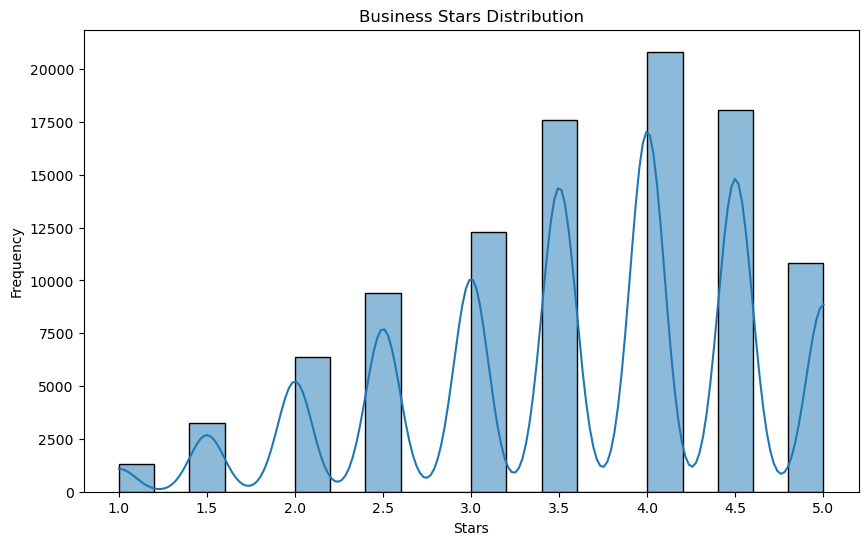

In [44]:
# Business Stars Distribution
plt.figure(figsize=(10,6))
sns.histplot(businesses['stars'], bins=20, kde=True)
plt.title('Business Stars Distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

Review Text Length Distribution

C:\Users\Taranjot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


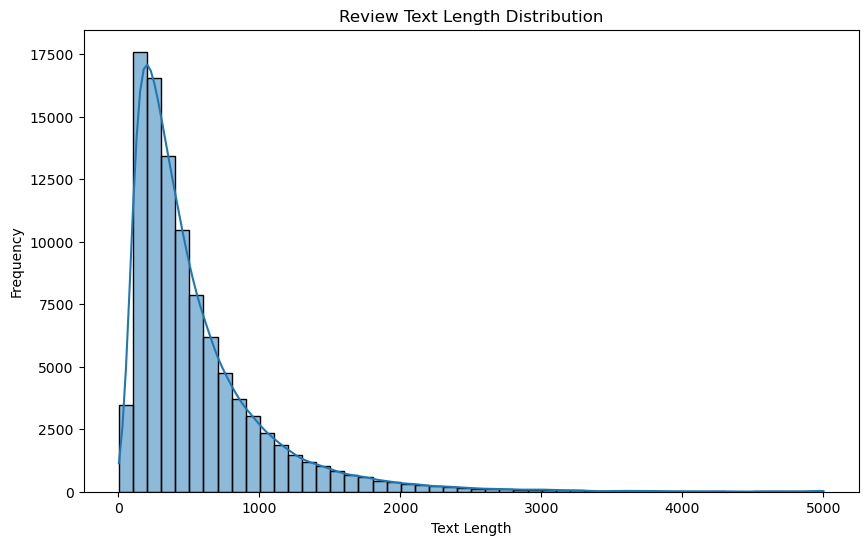

In [45]:
# Review Text Length Distribution
reviews['text_length'] = reviews['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(reviews['text_length'], bins=50, kde=True)
plt.title('Review Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Feature Engg.

In [46]:
import pandas as pd

# Assuming merged_df is your DataFrame
# Define the target variable
target_variable = 'is_open'

# Define the features to keep
features_to_keep = [
    'stars_x',            # Business rating
    'useful_x',           # User helpfulness votes
    'funny_x',            # User funny votes
    'cool_x',             # User cool votes
    'review_count_x',     # Number of reviews for the business
    'categories',         # Categories of the business
    'latitude',           # Latitude of the business
    'longitude',          # Longitude of the business
    'average_stars',      # Average rating
    'compliment_hot',     # Compliments related to hot
    'compliment_more',    # Compliments for more
    'compliment_profile',  # Compliments for profile
    'year_x',             # Year feature from date
]

# Create a new DataFrame with selected features and the target variable
X = merged_df[features_to_keep]
y = merged_df[target_variable]

In [47]:
# Display the new DataFrame
X.head()

stars_x  useful_x  funny_x  cool_x  review_count_x  \
45         4         0        0       0             338   
174        5        14        6       9              47   
216        4         1        0       0             485   
351        4         5        1       7               5   
467        4         3        0       1              16   

                                            categories   latitude   longitude  \
45   hotels, event planning & services, caterers, h...  39.947903  -75.164033   
174                                       food, donuts  36.191536  -86.625281   
216                          restaurants, cajun/creole  39.953322  -75.159000   
351  candy stores, chocolatiers & shops, specialty ...  27.965029  -82.519643   
467                                diners, restaurants  53.517660 -113.490226   

     average_stars  compliment_hot  compliment_more  compliment_profile  \
45            3.37             4.0              6.0                 0.0   
174           4.21            73.0             11.0                 8.0   
216           3.27           347.0             45.0                35.0   
351           4.04           394.0             42.0                21.0   
467           4.31            21.0              4.0                 1.0   

     year_x  
45     2013  
174    2014  
216    2017  
351    2016  
467    2011

In [48]:
y.head()

45     1
174    1
216    1
351    0
467    0
Name: is_open, dtype: int64

__Random Forest__

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

#Feature Engineering

# Create new features
merged_df['text_length_x'] = merged_df['text_x'].apply(len)  # Length of review text
merged_df['text_length_y'] = merged_df['text_y'].apply(len)  # Length of review text

# Convert date columns to datetime and extract additional features
merged_df['date_x'] = pd.to_datetime(merged_df['date_x'], errors='coerce')
merged_df['year_x'] = merged_df['date_x'].dt.year
merged_df['month_x'] = merged_df['date_x'].dt.month

# Select relevant features
features_to_keep = [
    'stars_x',            # Business rating
    'useful_x',           # User helpfulness votes
    'funny_x',            # User funny votes
    'cool_x',             # User cool votes
    'review_count_x',     # Number of reviews for the business
    'latitude',           # Latitude of the business
    'longitude',          # Longitude of the business
    'average_stars',      # Average rating
    'year_x',             # Year from the date
    'month_x',            # Month from the date
    'text_length_x',      # Length of review text
    'text_length_y'       # Length of review text
]

# Include categorical variables, such as categories
# For demonstration, we are using `categories` column; adjust it based on your actual data
merged_df = pd.get_dummies(merged_df, columns=['categories'], drop_first=True)

# Create feature matrix (X) and target vector (y)
X = merged_df[features_to_keep + [col for col in merged_df.columns if col.startswith('categories_')]]
y = merged_df['is_open']

In [50]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#Initialize and Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Step 5: Make Predictions and Evaluate the Model
y_pred = rf_model.predict(X_test)

In [53]:
# Step 6: Display Results
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[ 29,  55],
       [  1, 226]], dtype=int64)

In [54]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.35      0.51        84
           1       0.80      1.00      0.89       227

    accuracy                           0.82       311
   macro avg       0.89      0.67      0.70       311
weighted avg       0.85      0.82      0.79       311



In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.99%


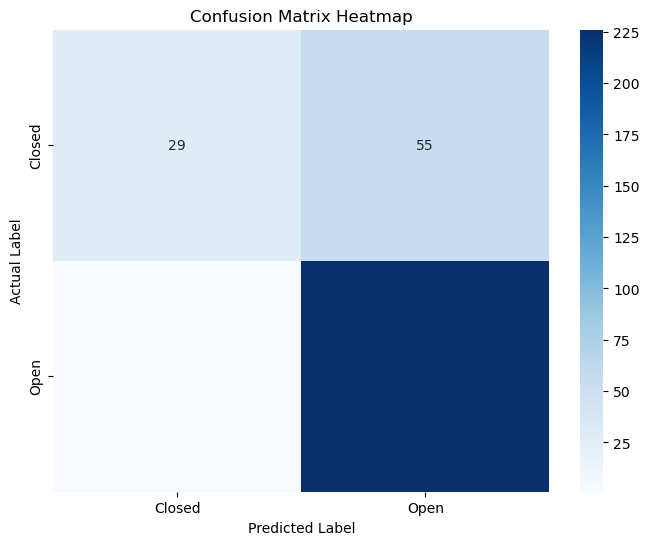

In [56]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Closed', 'Open'], yticklabels=['Closed', 'Open'])
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

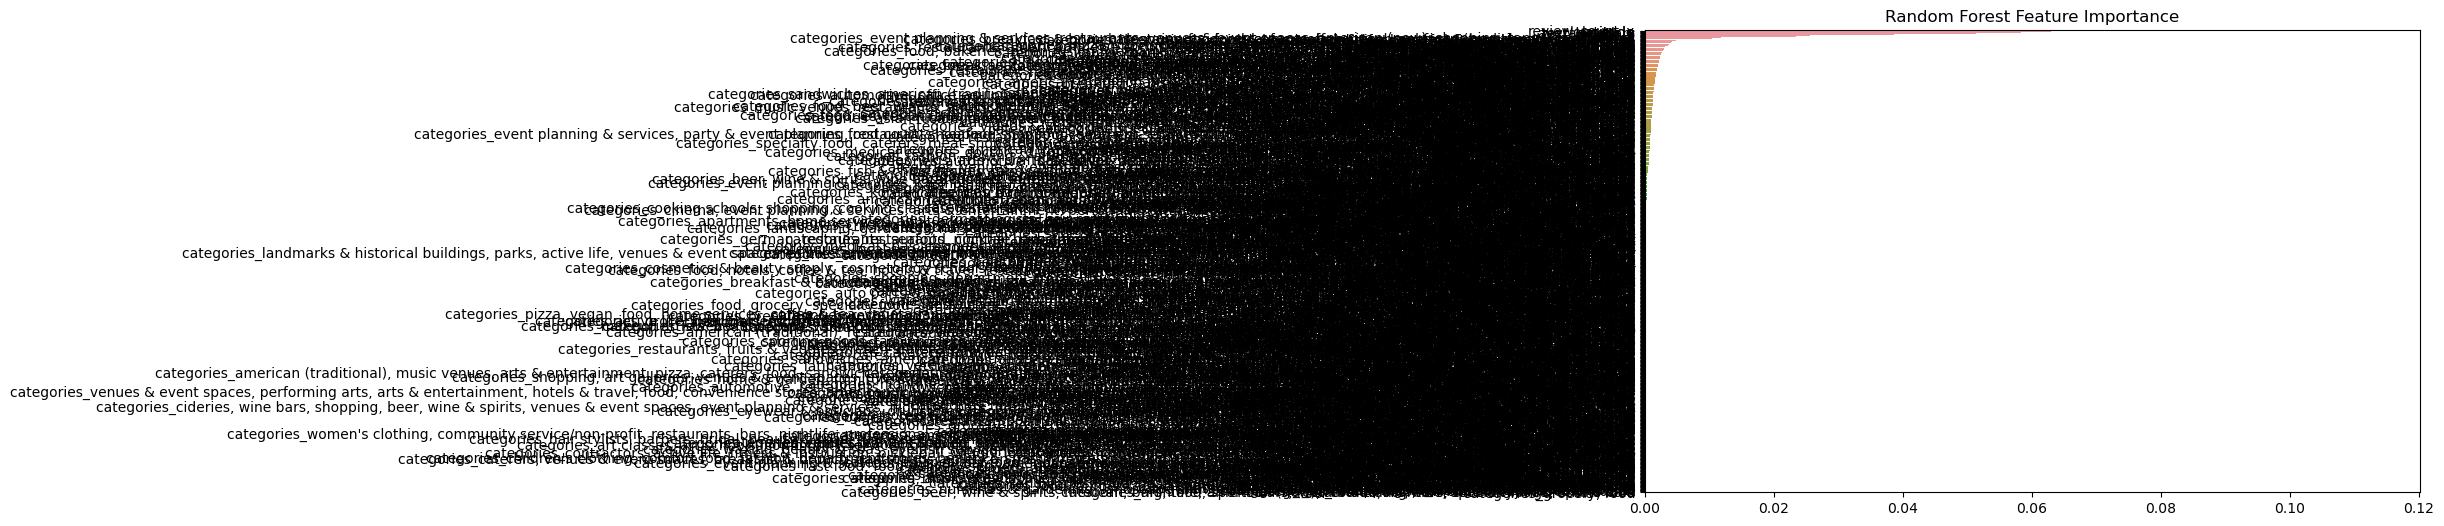

In [57]:
# Feature Importance Visualization
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Random Forest Feature Importance")
plt.show()

In [58]:
# --- LIME Explanation ---
import lime
import lime.lime_tabular

# Initialize LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X_train.columns, 
                                                   class_names=['Closed', 'Open'], 
                                                   mode='classification')

# Select a sample from the test set
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test.values[i], rf_model.predict_proba, num_features=10)

# Show the explanation
exp.show_in_notebook(show_table=True)

C:\Users\Taranjot\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
# 3 Round of Empirical Tunning 

In [60]:
# Step : Define Hyperparameter Ranges for Tuning
param_grid = [
    {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]},
    {'n_estimators': [150, 200], 'max_depth': [None, 15], 'min_samples_split': [3, 6]},
    {'n_estimators': [250, 300], 'max_depth': [None, 20], 'min_samples_split': [4, 8]}
]

# Step : Perform Three Rounds of Empirical Tuning
for round in range(3):
    print(f"--- Round {round + 1} ---")
    print("                          ")
    
    # Initialize Random Forest with current hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=param_grid[round]['n_estimators'][0], 
        max_depth=param_grid[round]['max_depth'][0],
        min_samples_split=param_grid[round]['min_samples_split'][0],
        random_state=42
    )

    # Fit the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("  ")

--- Round 1 ---
                          
Confusion Matrix:
[[ 29  55]
 [  4 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.35      0.50        84
           1       0.80      0.98      0.88       227

    accuracy                           0.81       311
   macro avg       0.84      0.66      0.69       311
weighted avg       0.82      0.81      0.78       311

  
--- Round 2 ---
                          
Confusion Matrix:
[[ 25  59]
 [  0 227]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        84
           1       0.79      1.00      0.88       227

    accuracy                           0.81       311
   macro avg       0.90      0.65      0.67       311
weighted avg       0.85      0.81      0.77       311

  
--- Round 3 ---
                          
Confusion Matrix:
[[ 22  62]
 [  0 227]]

Classification Report:
              pr

__AdaBoost__

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step : Initialize the AdaBoost Classifier
# You can specify the base estimator (e.g., DecisionTreeClassifier) and the number of estimators
base_estimator = DecisionTreeClassifier(max_depth=1)  # A weak learner
ada_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Step : Fit the AdaBoost Model
ada_model.fit(X_train, y_train)

# Step : Make Predictions and Evaluate the Model
y_pred = ada_model.predict(X_test)

# Step : Display Results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\Taranjot\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix:
[[ 43  41]
 [ 19 208]]


In [62]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.51      0.59        84
           1       0.84      0.92      0.87       227

    accuracy                           0.81       311
   macro avg       0.76      0.71      0.73       311
weighted avg       0.80      0.81      0.80       311



In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 80.71%


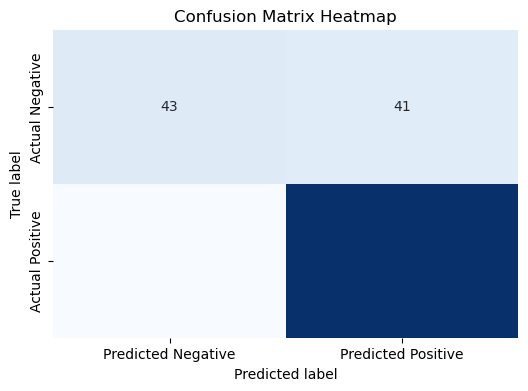

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualization : Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

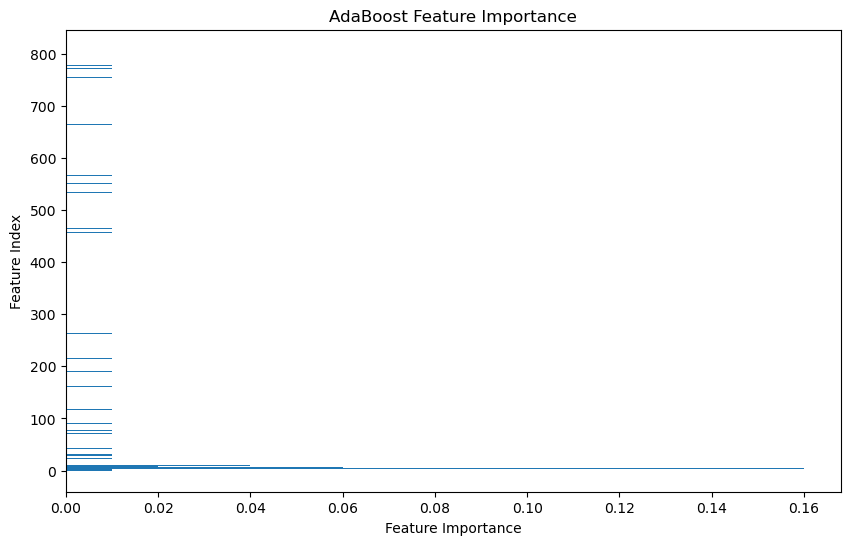

In [65]:
# Visualization : Feature Importance Plot
plt.figure(figsize=(10, 6))
feature_importances = ada_model.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Index')
plt.title('AdaBoost Feature Importance')
plt.show()

__Decision Tree__

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import shap

# Step : Define features and target variable
features_to_keep = [
    'stars_x', 'useful_x', 'funny_x', 'cool_x', 
    'review_count_x', 'latitude', 'longitude', 
    'average_stars', 'year_x', 'month_x', 
    'text_length_x', 'text_length_y'
]

# Check if 'categories' exists and create dummy variables
if 'categories' in merged_df.columns:
    merged_df = pd.get_dummies(merged_df, columns=['categories'], drop_first=True)
    X = merged_df[features_to_keep + [col for col in merged_df.columns if col.startswith('categories_')]]
else:
    X = merged_df[features_to_keep]

# Define the target variable
y = merged_df['is_open']

# Step : Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step : Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Define param grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Step : Predictions and Evaluation
y_pred = best_dt_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Confusion Matrix:
[[ 46  38]
 [ 44 183]]


In [67]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Decision Tree): {accuracy:.4f}")

Accuracy (Decision Tree): 0.7363


In [68]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.55      0.53        84
           1       0.83      0.81      0.82       227

    accuracy                           0.74       311
   macro avg       0.67      0.68      0.67       311
weighted avg       0.74      0.74      0.74       311



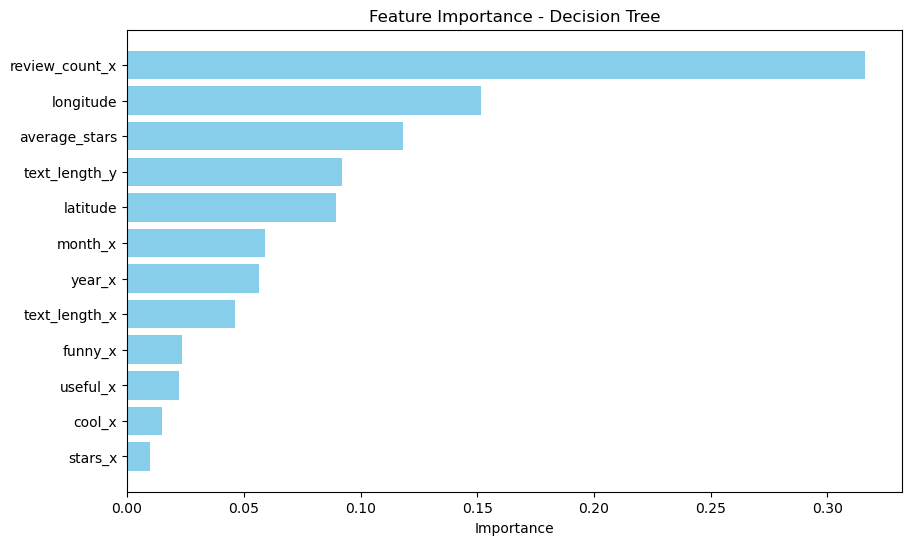

In [69]:
import matplotlib.pyplot as plt

# Get feature importances from the Decision Tree model
feature_importances = best_dt_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


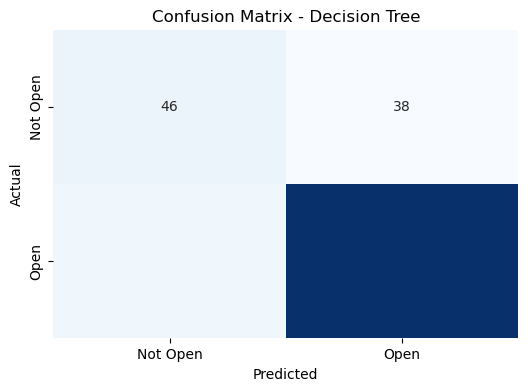

In [70]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Open', 'Open'], yticklabels=['Not Open', 'Open'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


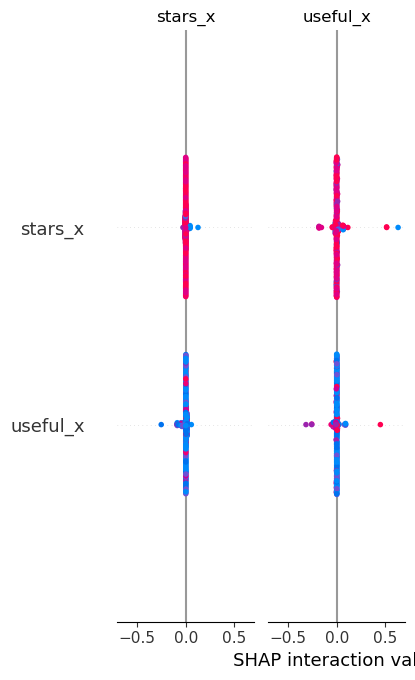

In [71]:
#shap
# Step : SHAP Analysis (optional)
explainer = shap.TreeExplainer(best_dt_model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values (you can use a specific index for a specific sample)
shap.summary_plot(shap_values, X_test)


In [72]:
#lime
import lime
from lime import lime_tabular
import shap

# Initialize LIME explainer with training data including all features (dummy variables if applicable)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Use full feature set including dummy variables
    feature_names=X.columns,
    class_names=['Not Open', 'Open'],
    mode='classification'
)

# Pick a sample to explain from X_test using the Decision Tree model
idx = 0  # Change index to explain different instances
exp = explainer_lime.explain_instance(X_test.iloc[idx].values, best_dt_model.predict_proba)

# Show the LIME explanation
exp.show_in_notebook(show_table=True)

C:\Users\Taranjot\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


__XG Boost__

In [73]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from xgboost import XGBClassifier
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [74]:
x_train = pd.read_csv(r"C:\Users\Taranjot\Downloads\x_train.csv")
x_test = pd.read_csv(r"C:\Users\Taranjot\Downloads\x_test.csv")
y_train = pd.read_csv(r"C:\Users\Taranjot\Downloads\y_train.csv")
y_test = pd.read_csv(r"C:\Users\Taranjot\Downloads\y_test.csv")

In [75]:
x_train.head()

city   latitude   longitude  stars  review_count_x  \
0   354  39.960415  -75.168604    4.0            1721   
1   398  38.682335  -90.475466    4.0              22   
2   466  27.912313  -82.491665    3.0             147   
3   125  53.447395 -113.485626    3.5              98   
4    42  36.035909  -86.785406    3.5              70   

                                               hours  compliment_count  \
0  {'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', '...                 0   
1  {'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3...                 0   
2  {'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...                 0   
3  {'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ...                 0   
4  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...                 0   

   review_count_y  useful  funny  ...  state_FL  state_ID  state_IL  state_IN  \
0             687    1792    522  ...         0         0         0         0   
1             202     303     70  ...         0         0         0         0   
2             209      92     22  ...         1         0         0         0   
3              14      22      3  ...         0         0         0         0   
4             241     306    251  ...         0         0         0         0   

   state_LA  state_MO  state_NJ  state_NV  state_PA  state_TN  
0         0         0         0         0         1         0  
1         0         1         0         0         0         0  
2         0         0         0         0         0         0  
3         0         0         0         0         0         0  
4         0         0         0         0         0         1  

[5 rows x 39 columns]

In [76]:
import pandas as pd
import ast

def extract_hours(hours_dict):
    if pd.isna(hours_dict):  # Check if the value is NaN
        return 0
    if isinstance(hours_dict, str):  # Handle string representation of dict
        hours_dict = ast.literal_eval(hours_dict)
        
    total_hours = 0
    for times in hours_dict.values():
        if times:  # Ensure times is not None
            start, end = times.split('-')
            
            # Check for the specific case of "00:00-00:00" (and "0:0-0:0")
            if (start == "00:00" and end == "00:00") or (start == "0:0" and end == "0:0"):
                total_hours += 24
                continue
            
            # Parse start and end times
            start_hour = int(start.split(':')[0]) + int(start.split(':')[1]) / 60
            end_hour = int(end.split(':')[0]) + int(end.split(':')[1]) / 60
            
            # If end hour is less than start hour, it means the interval crosses midnight
            if end_hour < start_hour:
                end_hour += 24
            
            total_hours += end_hour - start_hour
            
    return total_hours

def calculate_total_hours(df):
    total_hours = 0
    for index, row in df.iterrows():
        hours_dict = row['hours']  # Change 'hours' to your actual column name
        total_hours += extract_hours(hours_dict)

    print(f'Total hours worked: {total_hours}')

# Example usage (uncomment and modify as needed for testing)
# df = pd.DataFrame({'hours': ["{'Monday': '00:00-00:00', 'Tuesday': '09:00-17:00'}", 
#                              "{'Wednesday': '08:00-16:00', 'Thursday': '00:00-00:00'}"]})
# calculate_total_hours(df)


In [77]:
# Apply the function to create a new feature
x_train['total_hours'] = x_train['hours'].apply(extract_hours)

In [78]:
x_train.drop('hours', axis=1, inplace=True)

In [79]:
x_train.head()

city   latitude   longitude  stars  review_count_x  compliment_count  \
0   354  39.960415  -75.168604    4.0            1721                 0   
1   398  38.682335  -90.475466    4.0              22                 0   
2   466  27.912313  -82.491665    3.0             147                 0   
3   125  53.447395 -113.485626    3.5              98                 0   
4    42  36.035909  -86.785406    3.5              70                 0   

   review_count_y  useful  funny  cool  ...  state_ID  state_IL  state_IN  \
0             687    1792    522   751  ...         0         0         0   
1             202     303     70    55  ...         0         0         0   
2             209      92     22    19  ...         0         0         0   
3              14      22      3     8  ...         0         0         0   
4             241     306    251   144  ...         0         0         0   

   state_LA  state_MO  state_NJ  state_NV  state_PA  state_TN  total_hours  
0         0         0         0         0         1         0         66.0  
1         0         1         0         0         0         0         79.0  
2         0         0         0         0         0         0         72.0  
3         0         0         0         0         0         0         96.0  
4         0         0         0         0         0         1         78.0  

[5 rows x 39 columns]

In [80]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
print("Train features:", x_train.columns.tolist())
print("Test features:", x_test.columns.tolist())

Train features: ['city', 'latitude', 'longitude', 'stars', 'review_count_x', 'compliment_count', 'review_count_y', 'useful', 'funny', 'cool', 'elite', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos', 'state_AB', 'state_AZ', 'state_CA', 'state_DE', 'state_FL', 'state_ID', 'state_IL', 'state_IN', 'state_LA', 'state_MO', 'state_NJ', 'state_NV', 'state_PA', 'state_TN', 'total_hours']
Test features: ['city', 'latitude', 'longitude', 'stars', 'review_count_x', 'compliment_count', 'review_count_y', 'useful', 'funny', 'cool', 'elite', 'fans', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos', 'state_AB', 'state_AZ', 'state_C

In [82]:
for col in x_train.columns:
    if col not in x_test.columns:
        x_test[col] = 0  # or use np.nan if you prefer
x_test = x_test[x_train.columns]  # Ensure the order and columns match

In [83]:
# Predict on training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [84]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8974465723008604
Test Accuracy: 0.7140319715808171


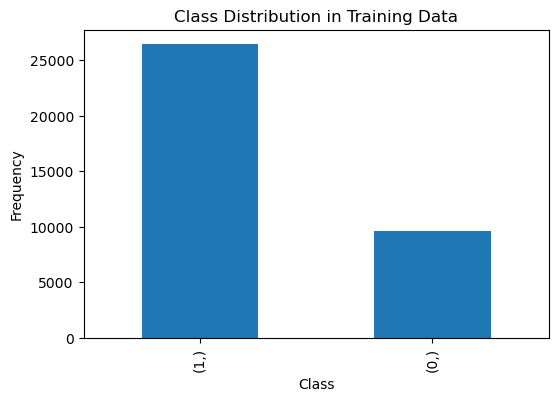

In [85]:
# Check for Class Imbalance
plt.figure(figsize=(6, 4))
y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [86]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x_train, y_train)

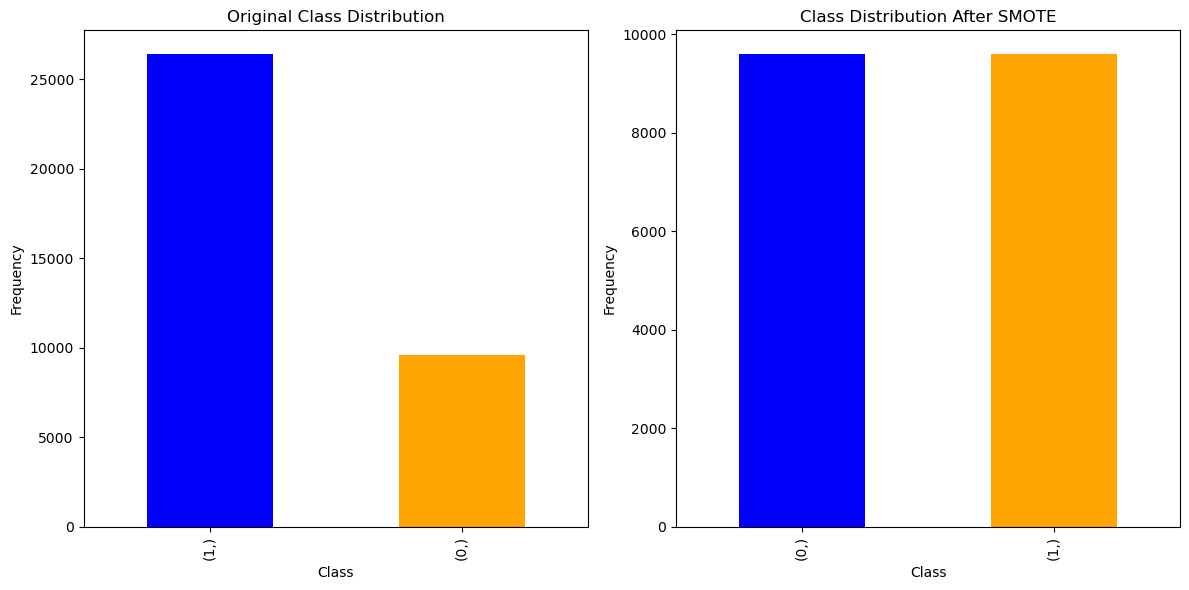

In [87]:
# Original class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

# After applying SMOTE
plt.subplot(1, 2, 2)
y_resampled.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [88]:
import seaborn as sns

# Train the model
model = xgb.XGBClassifier()
model.fit(x_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(x_test)

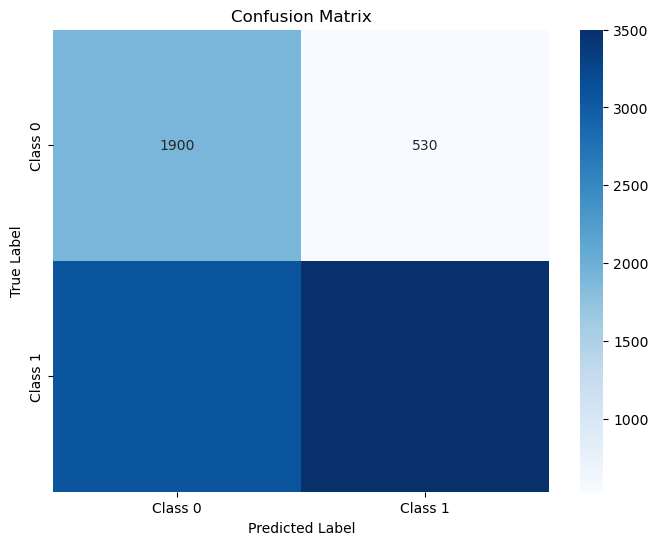

In [89]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.78      0.51      2430
           1       0.87      0.53      0.66      6578

    accuracy                           0.60      9008
   macro avg       0.63      0.66      0.59      9008
weighted avg       0.74      0.60      0.62      9008



Feature Importance

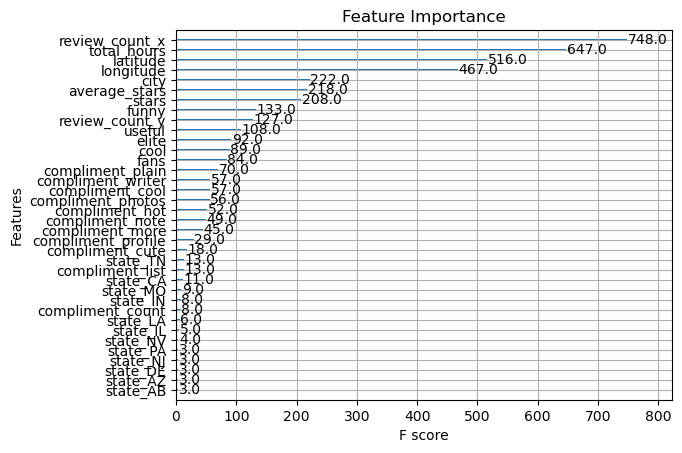

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

# Train the initial model
model = xgb.XGBClassifier()
model.fit(x_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Check feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

In [92]:
# Round 1  Initialize the XGBoost classifier

In [93]:
# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for Round 1
param_grid_1 = {
    'max_depth': [3, 5, 7, 9],  # Depth of the trees
    'learning_rate': [0.01, 0.1, 0.2]  # Step size shrinkage
}

# Initialize the XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search_1 = GridSearchCV(model,
                              param_grid=param_grid_1,
                              cv=3,  # 3-fold cross-validation
                              scoring='f1',  # Use F1 score as the metric
                              n_jobs=-1,  # Use all available cores
                              verbose=1)  # Verbose output

# Fit the model
grid_search_1.fit(x_train, y_train)

# Output the best parameters and best score
print("Best parameters from Round 1:", grid_search_1.best_params_)
print("Best F1 Score from Round 1:", grid_search_1.best_score_)

# Evaluate the best model on the test set
best_model_1 = grid_search_1.best_estimator_
y_pred = best_model_1.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters from Round 1: {'learning_rate': 0.2, 'max_depth': 9}
Best F1 Score from Round 1: 0.8919958527048341
              precision    recall  f1-score   support

           0       0.46      0.43      0.44      2430
           1       0.79      0.81      0.80      6578

    accuracy                           0.71      9008
   macro avg       0.63      0.62      0.62      9008
weighted avg       0.70      0.71      0.71      9008



In [94]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model from Round 1:", accuracy)

Accuracy of the best model from Round 1: 0.70848134991119


In [95]:
# Round 2  Initialize GridSearchCV

In [96]:
param_grid_2 = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'subsample': [0.5, 0.7, 1.0]      # Fraction of samples to use for each tree
}

In [97]:
# Initialize GridSearchCV for Round 2
grid_search_2 = GridSearchCV(XGBClassifier(**grid_search_1.best_params_, use_label_encoder=False, eval_metric='logloss'),
                              param_grid=param_grid_2,
                              cv=3,  # 3-fold cross-validation
                              scoring='f1',  # Use F1 score as the metric
                              n_jobs=-1,  # Use all available cores
                              verbose=1)  # Verbose output

# Fit the model
grid_search_2.fit(x_train, y_train)

# Output the best parameters and best score
print("Best parameters from Round 2:", grid_search_2.best_params_)
print("Best F1 Score from Round 2:", grid_search_2.best_score_)

# Evaluate the best model on the test set
best_model_2 = grid_search_2.best_estimator_
y_pred_2 = best_model_2.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred_2))

# Calculate and print accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy of the best model from Round 2:", accuracy_2)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters from Round 2: {'n_estimators': 200, 'subsample': 1.0}
Best F1 Score from Round 2: 0.8983909322221871
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      2430
           1       0.81      0.82      0.81      6578

    accuracy                           0.73      9008
   macro avg       0.65      0.65      0.65      9008
weighted avg       0.72      0.73      0.73      9008

Accuracy of the best model from Round 2: 0.7266873889875666


In [98]:
# Round 3: Tuning gamma and colsample_bytree

# Initialize GridSearchCV for Round 3
grid_search_3 = GridSearchCV(
    XGBClassifier(
        n_estimators=grid_search_2.best_params_['n_estimators'],  # Keep the best n_estimators
        learning_rate=grid_search_1.best_params_['learning_rate'],  # Keep the best learning_rate
        max_depth=grid_search_1.best_params_['max_depth'],  # Keep the best max_depth
        subsample=grid_search_2.best_params_['subsample'],  # Keep the best subsample
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    param_grid={
        'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction to make further partition
        'colsample_bytree': [0.3, 0.5, 0.7]  # Fraction of features used for each tree
    },
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # Use F1 score as the metric
    n_jobs=-1,  # Use all available cores
    verbose=1  # Verbose output
)

# Fit the model
grid_search_3.fit(x_train, y_train)

# Output the best parameters and best score
print("Best parameters from Round 3:", grid_search_3.best_params_)
print("Best F1 Score from Round 3:", grid_search_3.best_score_)

# Evaluate the best model on the test set
best_model_3 = grid_search_3.best_estimator_
y_pred_3 = best_model_3.predict(x_test)

# Print classification report
print(classification_report(y_test, y_pred_3))

# Calculate and print accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Accuracy of the best model from Round 3:", accuracy_3)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters from Round 3: {'colsample_bytree': 0.7, 'gamma': 0.1}
Best F1 Score from Round 3: 0.8986272587024478
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      2430
           1       0.82      0.82      0.82      6578

    accuracy                           0.74      9008
   macro avg       0.67      0.67      0.67      9008
weighted avg       0.74      0.74      0.74      9008

Accuracy of the best model from Round 3: 0.7424511545293073


# Interpretation:
In the final round, we optimized gamma and colsample_bytree to further regularize the model and enhance feature diversity. This tuning aimed to refine predictions across both classes, building on previous improvements and reinforcing the model's robustness, particularly in mitigating overfitting and improving generalization.

In [100]:
import pickle

In [101]:
# Save the model as a pickle file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [102]:
# Save the trained AdaBoost model to a pickle file
with open('ada_boost_model.pkl', 'wb') as file:
    pickle.dump(ada_model, file)

print("Model saved to ada_boost_model.pkl")


Model saved to ada_boost_model.pkl


In [103]:
# Save the trained model to a pickle file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_dt_model, file)

print("Model saved as decision_tree_model.pkl")


Model saved as decision_tree_model.pkl


In [105]:
# Save the model as a pickle file
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'xgboost_model.pkl'")


Model saved as 'xgboost_model.pkl'
